In [ ]:
import numpy as np
import nitime.timeseries as nts
import nitime.analysis as nta
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
import nitime.viz as viz
import networkx as nx

In [3]:
mat = sio.loadmat('./connectome.mat', squeeze_me=True)

In [4]:
mat.keys()

dict_keys(['M_ll', '__version__', 'M_w', '__header__', '__globals__', 'M_nf'])

In [5]:
M_nf = mat['M_nf']
M_w = mat['M_w']
M_ll = mat['M_ll']

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

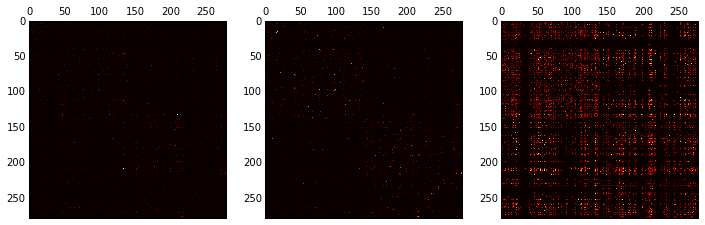

In [7]:
fig, ax = plt.subplots(1, 3)
ax[0].matshow(M_nf, cmap="hot")
ax[1].matshow(M_w, cmap="hot")
ax[2].matshow(M_ll, cmap="hot")
fig.set_size_inches([12, 12])

In [8]:
foo = np.log2(M_ll[np.tril_indices(M_ll.shape[-1])])

/Users/arokem/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':


(array([  1.00000000e+00,   5.00000000e+00,   1.20000000e+01,
          3.90000000e+01,   9.50000000e+01,   3.21000000e+02,
          1.09800000e+03,   1.73500000e+03,   1.12200000e+03,
          1.50000000e+02]),
 array([-0.05998803,  0.85090803,  1.76180408,  2.67270014,  3.58359619,
         4.49449225,  5.4053883 ,  6.31628436,  7.22718042,  8.13807647,
         9.04897253]),
 <a list of 10 Patch objects>)

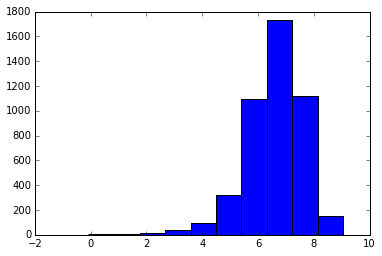

In [9]:
plt.hist(foo[np.isfinite(foo)])

In [10]:
thresholded = np.zeros_like(M_ll)
thresholded[np.log2(M_ll)>6] = 1

/Users/arokem/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app


In [13]:
G = nx.MultiGraph(np.log2(M_ll))

/Users/arokem/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log2
  if __name__ == '__main__':


In [15]:
matfc = sio.loadmat('./iu-hackathon-2015/MRI/subj1/FC.mat', squeeze_me=True)

In [16]:
Taal_lp = matfc['Taal_lp']

In [18]:
mean_taal = np.mean(Taal_lp, -1)

In [19]:
mean_taal.shape

(1200,)

In [20]:
Taal_lp.shape

(1200, 278)

In [21]:
Taal_lp_aug = Taal_lp - mean_taal[:, None]

In [22]:
Taal_lp_aug.shape

(1200, 278)

In [23]:
ts = nts.TimeSeries(Taal_lp_aug.T, sampling_interval=.813)

In [24]:
CA = nta.CoherenceAnalyzer(ts)

In [25]:
bands = np.where(np.logical_and(CA.frequencies>0.009, CA.frequencies<0.1))

In [26]:
CA.coherence[:, :, bands[0]].shape

(278, 278, 5)

In [27]:
mean_coherence = np.mean(CA.coherence[:, :, bands[0]], -1)

In [37]:
ordering_mat = sio.loadmat('iu-hackathon-2015/ordering_matrices/yeo_RS7.mat')
oo = ordering_mat['yeoOrder'].squeeze()-1

In [38]:
import nitime.viz as viz

/Users/arokem/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


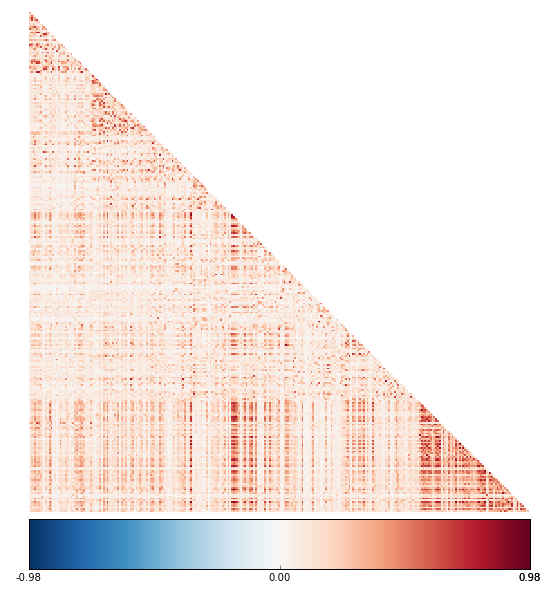

In [39]:
fig01 = viz.drawmatrix_channels(mean_coherence[oo][:, oo], size=[10., 10.], color_anchor=0)

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

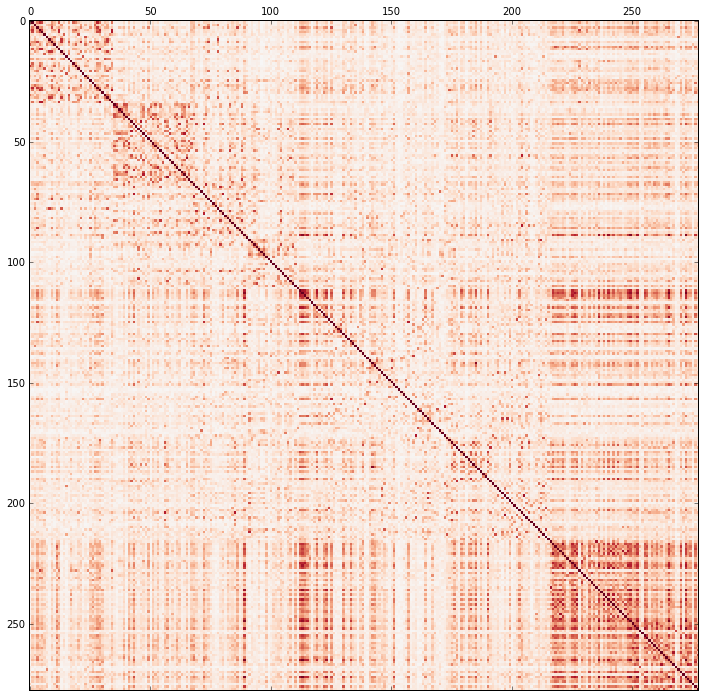

In [41]:
fig, ax = plt.subplots(1)
ax.matshow(mean_coherence[oo][:, oo], cmap='RdBu_r', vmin=-0.98, vmax=0.98)
fig.set_size_inches([12, 12])

In [42]:
CorrA = nta.CorrelationAnalyzer(ts)

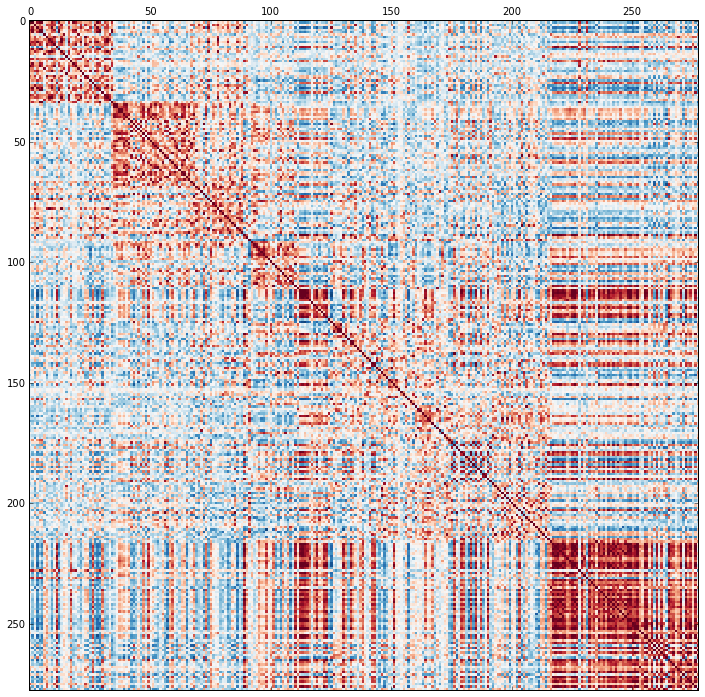

In [45]:
fig, ax = plt.subplots(1)
ax.matshow(CorrA.corrcoef[oo][:, oo], cmap='RdBu_r', vmin=-0.8, vmax=0.8)
fig.set_size_inches([12, 12])